In [169]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras import models
import pandas as pd

In [170]:
df = pd.read_csv('salary_dataset.csv')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   experience_in_years  30 non-null     float64
 1   salary               30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [172]:
df_test_split = df.sample(frac=0.7,random_state=151)
df_test_split.reset_index()

,index,experience_in_years,salary
0,1,10.6,121873.0
1,3,8.3,113813.0
2,13,5.0,67939.0
3,23,4.1,55795.0
4,22,3.0,56643.0
5,15,3.3,64446.0
6,19,3.8,57190.0
7,14,5.2,66030.0
8,6,9.1,105583.0
9,9,6.1,93941.0


In [173]:
x_train = df.pop('experience_in_years')
y_train = df.pop('salary')

x_test = df_test_split.pop('experience_in_years')
y_test = df_test_split.pop('salary')

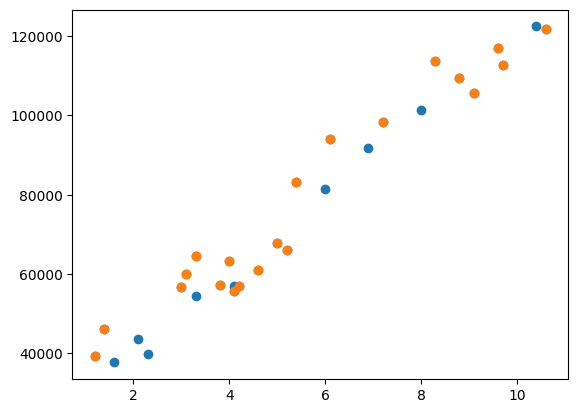

In [174]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)

In [175]:
normalizer = layers.Normalization(input_shape =[1,],axis=None)
normalizer.adapt(np.array(x_train))
# normalizer.adapt(np.array(x_test))

print(normalizer.mean.numpy())


[5.4133334]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [176]:
model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae','accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [177]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step - accuracy: 0.0000e+00 - loss: 6503153152.0000 - mae: 76004.2578
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 6503114752.0000 - mae: 76004.0391
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 6503078400.0000 - mae: 76003.8359
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 6503042560.0000 - mae: 76003.6406
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 6503007744.0000 - mae: 76003.4531
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0000e+00 - loss: 6502973952.0000 - mae: 76003.2500
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 6502939648.0000 - mae: 76003.0547
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 6502906368.0000 - mae: 76002.8672
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss

In [178]:
y_predicted_from_train = model.predict_on_batch(x_train)
print(y_predicted_from_train)

[[71.74945 ]
 [73.06639 ]
 [66.48169 ]
 [57.921555]
 [67.14015 ]
 [61.21391 ]
 [63.189323]
 [55.946136]
 [50.678364]
 [43.43518 ]
 [48.70295 ]
 [38.825882]
 [42.776707]
 [36.191994]
 [37.508934]
 [24.99798 ]
 [29.60728 ]
 [33.558105]
 [23.681038]
 [28.290337]
 [30.924223]
 [30.265753]
 [23.022566]
 [30.265753]
 [24.99798 ]
 [12.487022]
 [17.096321]
 [18.413265]
 [11.170079]
 [13.803965]]


In [179]:
y_predicted_from_test = model.predict_on_batch(x_test)
print(y_predicted_from_test)

[[73.06639 ]
 [57.921555]
 [36.191994]
 [30.265753]
 [23.022566]
 [24.99798 ]
 [28.290337]
 [37.508934]
 [63.189323]
 [43.43518 ]
 [50.678364]
 [30.924223]
 [67.14015 ]
 [11.170079]
 [29.60728 ]
 [61.21391 ]
 [33.558105]
 [12.487022]
 [23.681038]
 [38.825882]
 [66.48169 ]]


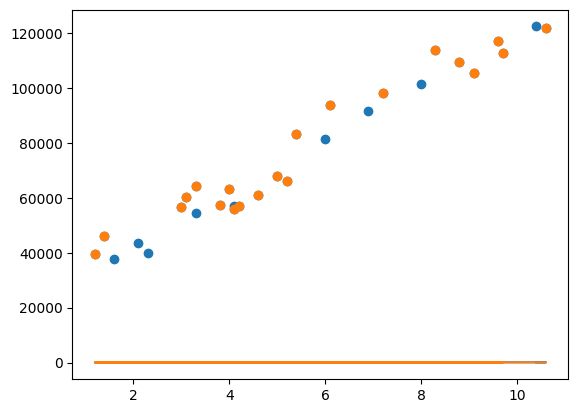

In [180]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)

plt.plot(x_train,y_predicted_from_train)
plt.plot(x_test,y_predicted_from_test)
plt.show()